## Here we compare different CNN models with different structures but almost identical architecture to see if modifications affect models performances using first pooling layer adjustments into relation to symmetries of detector images

In [99]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sys
from pathlib import Path
import math

#torch 
import torch
import torchvision as torchv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch import Tensor
from torch.utils import data
from torchsummary import summary

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

In [100]:
#Sjekke om device GPU er på
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [101]:
#Metode for å hente data frå mappe
module_path = str(Path.cwd().parents[0].parents[0] / "methods")

if module_path not in sys.path:
    sys.path.append(module_path)

from dataloader import *
# from plotCreator import *

data_path0 = str(Path.cwd().parents[0].parents[0] / "data" / "BH_n4_M10_res50_15000_events.h5")
data_path1 = str(Path.cwd().parents[0].parents[0] / "data" / "PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL_res50_15000_events.h5")

In [102]:
import train
import nnmodel

In [103]:
#Hente data og sette til array
bhArray = dataToArray(data_path0)
sphArray = dataToArray(data_path1)

In [104]:
#Kombinerer dataene for å kunne kjøre gjennom modellen på et samlet datasett
dataArray = np.concatenate((bhArray,sphArray),axis=0)

In [105]:
# Labeler tabelle med 1 og 0 (0 = svart hull, 1 = spahleron)
labelsArray = np.concatenate((np.zeros(np.shape(bhArray)[0]),np.ones(np.shape(sphArray)[0])),axis=0)

In [106]:
#Split data 75% i train og 25% i test
trainData, testData, trainLabels, testLabels = train_test_split(dataArray, labelsArray, random_state=42)

In [107]:
#Transofrm from numpy array to torch
trainData = torch.from_numpy(trainData).permute(0,3,1,2)
testData = torch.from_numpy(testData).permute(0,3,1,2)
trainLabels = torch.from_numpy(trainLabels)
testLabels = torch.from_numpy(testLabels)

In [108]:
#Transformere numpy til tensor
train = torch.utils.data.TensorDataset(trainData, trainLabels)
test = torch.utils.data.TensorDataset(testData, testLabels)

In [109]:
#Transform data data to dataloader
trainLoader = DataLoader(train, shuffle=True, batch_size=200)
testLoader = DataLoader(test, shuffle=True, batch_size=200)

In [110]:
model = nnmodel.ConvModel(0.5).to(device)  # Move the model to the appropriate device

# Print the model summary, make sure to provide appropriate input size (3, 50, 50) for the 3-channel 50x50 images
summary(model, (3, 50, 50))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 50, 50]           1,792
       BatchNorm2d-2           [-1, 64, 50, 50]             128
            Conv2d-3          [-1, 128, 25, 25]          73,856
       BatchNorm2d-4          [-1, 128, 25, 25]             256
            Conv2d-5          [-1, 256, 12, 12]         295,168
       BatchNorm2d-6          [-1, 256, 12, 12]             512
            Conv2d-7            [-1, 512, 6, 6]       1,180,160
       BatchNorm2d-8            [-1, 512, 6, 6]           1,024
            Conv2d-9           [-1, 1024, 3, 3]       4,719,616
      BatchNorm2d-10           [-1, 1024, 3, 3]           2,048
           Linear-11                 [-1, 2048]       2,099,200
          Dropout-12                 [-1, 2048]               0
           Linear-13                  [-1, 512]       1,049,088
          Dropout-14                  [

In [111]:
model = nnmodel.ConvModel(0.5).to(device)  # Move the model to the appropriate device

# Print the model summary, make sure to provide appropriate input size (3, 50, 50) for the 3-channel 50x50 images
summary(model, (3, 50, 50))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 50, 50]           1,792
       BatchNorm2d-2           [-1, 64, 50, 50]             128
            Conv2d-3          [-1, 128, 25, 25]          73,856
       BatchNorm2d-4          [-1, 128, 25, 25]             256
            Conv2d-5          [-1, 256, 12, 12]         295,168
       BatchNorm2d-6          [-1, 256, 12, 12]             512
            Conv2d-7            [-1, 512, 6, 6]       1,180,160
       BatchNorm2d-8            [-1, 512, 6, 6]           1,024
            Conv2d-9           [-1, 1024, 3, 3]       4,719,616
      BatchNorm2d-10           [-1, 1024, 3, 3]           2,048
           Linear-11                 [-1, 2048]       2,099,200
          Dropout-12                 [-1, 2048]               0
           Linear-13                  [-1, 512]       1,049,088
          Dropout-14                  [

In [112]:
model = nnmodel.ConvModelFPLMod(0.5).to(device)  # Move the model to the appropriate device

# Print the model summary, make sure to provide appropriate input size (3, 50, 50) for the 3-channel 50x50 images
summary(model, (3, 50, 50))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 50, 50]           1,792
       BatchNorm2d-2           [-1, 64, 50, 50]             128
            Conv2d-3          [-1, 128, 25, 25]          73,856
       BatchNorm2d-4          [-1, 128, 25, 25]             256
            Conv2d-5          [-1, 256, 12, 12]         295,168
       BatchNorm2d-6          [-1, 256, 12, 12]             512
            Conv2d-7            [-1, 512, 6, 6]       1,180,160
       BatchNorm2d-8            [-1, 512, 6, 6]           1,024
            Conv2d-9           [-1, 1024, 3, 3]       4,719,616
      BatchNorm2d-10           [-1, 1024, 3, 3]           2,048
           Linear-11                 [-1, 2048]       2,099,200
          Dropout-12                 [-1, 2048]               0
           Linear-13                  [-1, 512]       1,049,088
          Dropout-14                  [

Koden under utfører treningen og plotter alt i noen utvalgte grafer, må ryddes i for å få bedre oversikt!

In [113]:
import pandas as pd
import train
from tabulate import tabulate

def create_results_table(all_run_metrics, model_classes):
    n_epochs = len(all_run_metrics[0][0])
    n_runs = len(all_run_metrics[0])
    metric_names = list(all_run_metrics[0][0][0].keys())

    for i, model_metrics in enumerate(all_run_metrics):
        model_name = model_classes[i].__name__

        data = {'Epoch': list(range(1, n_epochs + 1)) + ['Overall Average', 'Best Result']}

        for metric_name in metric_names:
            if metric_name != 'epoch' and metric_name != 'all_preds' and metric_name != 'all_labels':
                avg_metrics = []
                std_metrics = []
                best_metric = None
                best_epoch = None

                for epoch in range(n_epochs):
                    metric_values = [model_metrics[run][epoch][metric_name] for run in range(n_runs)]
                    avg_metrics.append(np.mean(metric_values))
                    std_metrics.append(np.std(metric_values))

                    # Update the best metric and epoch
                    if 'loss' in metric_name:
                        if best_metric is None or np.mean(metric_values) < best_metric:
                            best_metric = np.mean(metric_values)
                            best_epoch = epoch + 1
                    else:
                        if best_metric is None or np.mean(metric_values) > best_metric:
                            best_metric = np.mean(metric_values)
                            best_epoch = epoch + 1

                # Add the overall average and best result to the metrics
                avg_metrics += [np.mean(avg_metrics), best_metric]
                std_metrics += [np.std(avg_metrics[:-1]), '']
                data[metric_name] = [f"{avg:.2f} ± {std:.2f}" for avg, std in zip(avg_metrics[:-2], std_metrics[:-2])]
                data[metric_name] += [f"{avg_metrics[-2]:.2f} ± {std_metrics[-2]:.2f}", f"{best_metric:.2f} (Epoch {best_epoch})"]

        df = pd.DataFrame(data)
        print(f"\nMetrics for {model_name}:")
        print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))


In [114]:
def predict_best_model(model, data_loader, device):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for data in data_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_preds, all_labels

In [115]:
def train_multiple_runs(model_class, n_runs, n_epochs, train_loader, test_loader, dropout):
    all_run_metrics = []
    all_best_models = []

    for run in range(n_runs):
        print(f"Run: {run + 1}/{n_runs}")

        model = model_class(dropout=dropout).to(device)
        optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-4)
        criterion = nn.CrossEntropyLoss().to(device)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, verbose=True, factor=0.5)
        
        run_results, best_model, _, _= train.train(model, train_loader, test_loader, optimizer, criterion, n_epochs, scheduler)
        all_run_metrics.append(run_results)
        all_best_models.append(best_model)

    # Compute average metrics
    avg_run_metrics = {}
    for metric in all_run_metrics[0][-1].keys():
        if metric not in ['all_preds', 'all_labels', 'epoch']:
            avg_run_metrics[metric] = [np.mean([run[epoch][metric] for run in all_run_metrics]) for epoch in range(n_epochs)]

    return avg_run_metrics, all_run_metrics, all_best_models


def plot_average_metrics(all_avg_run_metrics, model_classes):
    metric_pairs = [
        (['train_losses', 'test_losses'], 'Loss'),
        (['train_accs', 'test_accs'], 'Accuracy'),
        (['black_holes_accs', 'sphalerons_accs'], 'Black Holes and Sphalerons Accuracy'),
        (['precisions', 'recalls'], 'Precision and Recall')
    ]

    fig, axs = plt.subplots(2, 2, figsize=(20, 10))

    for i, metric_pair in enumerate(metric_pairs):
        ax = axs[i//2, i%2]

        for j, avg_run_metrics in enumerate(all_avg_run_metrics):
            model_name = model_classes[j].__name__

            for metric_name in metric_pair[0]:
                metric_values = avg_run_metrics[metric_name]

                if isinstance(metric_values[0], list):  # If precision and recall (multi-class metrics)
                    for k in range(len(metric_values[0])):
                        class_values = [values[k] for values in metric_values]
                        ax.plot(class_values, label=f'{model_name} {metric_name.capitalize()} Class {k}')
                else:  # If single value metrics
                    ax.plot(metric_values, label=f'{model_name} {metric_name.capitalize()}')

        ax.set_title(f'Average {metric_pair[1]} Over Runs')
        ax.set_xlabel('Epoch')
        ax.set_ylabel(metric_pair[1])
        ax.legend()

    plt.tight_layout()
    plt.show()


def average_confusion_matrix(all_best_models, model_class, test_loader, n_classes, device, dropout):
    all_matrices = []
    for best_model_state in all_best_models:
        model = model_class(dropout=dropout)
        model.load_state_dict(best_model_state)
        model.to(device)
        
        all_preds, all_labels = predict_best_model(model, test_loader, device)
        cm = confusion_matrix(all_labels, all_preds, labels=range(n_classes))
        all_matrices.append(cm)

    avg_cm = np.mean(all_matrices, axis=0)
    return avg_cm


def plot_confusion_matrix(all_best_models, model_class, test_loader, n_classes, device, dropout):
    all_matrices = []
    for best_model_state in all_best_models:
        model = model_class(dropout=dropout)
        model.load_state_dict(best_model_state)
        model.to(device)

        all_preds, all_labels = predict_best_model(model, test_loader, device)
        cm = confusion_matrix(all_labels, all_preds, labels=range(n_classes))
        all_matrices.append(cm)

    avg_cm = np.mean(all_matrices, axis=0)

    plt.figure(figsize=(6, 6))
    plt.imshow(avg_cm, cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_class.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks([0, 1], ['Black Holes', 'Sphalerons'])
    plt.yticks([0, 1], ['Black Holes', 'Sphalerons'])

    for i in range(2):
        for j in range(2):
            plt.text(j, i, int(avg_cm[i, j]), ha='center', va='center', color='black', fontsize=16)

    plt.colorbar()
    plt.show()

Run: 1/5
Epoch 00005: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00011: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00016: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00020: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00024: reducing learning rate of group 0 to 3.1250e-05.
Epoch 00028: reducing learning rate of group 0 to 1.5625e-05.
Epoch 00032: reducing learning rate of group 0 to 7.8125e-06.
Epoch 00036: reducing learning rate of group 0 to 3.9063e-06.
Epoch 00040: reducing learning rate of group 0 to 1.9531e-06.
Epoch 00044: reducing learning rate of group 0 to 9.7656e-07.
Epoch 00048: reducing learning rate of group 0 to 4.8828e-07.
Run: 2/5
Epoch 00007: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00012: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00020: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00024: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00028: reducing learning rate of group 0 to 3.

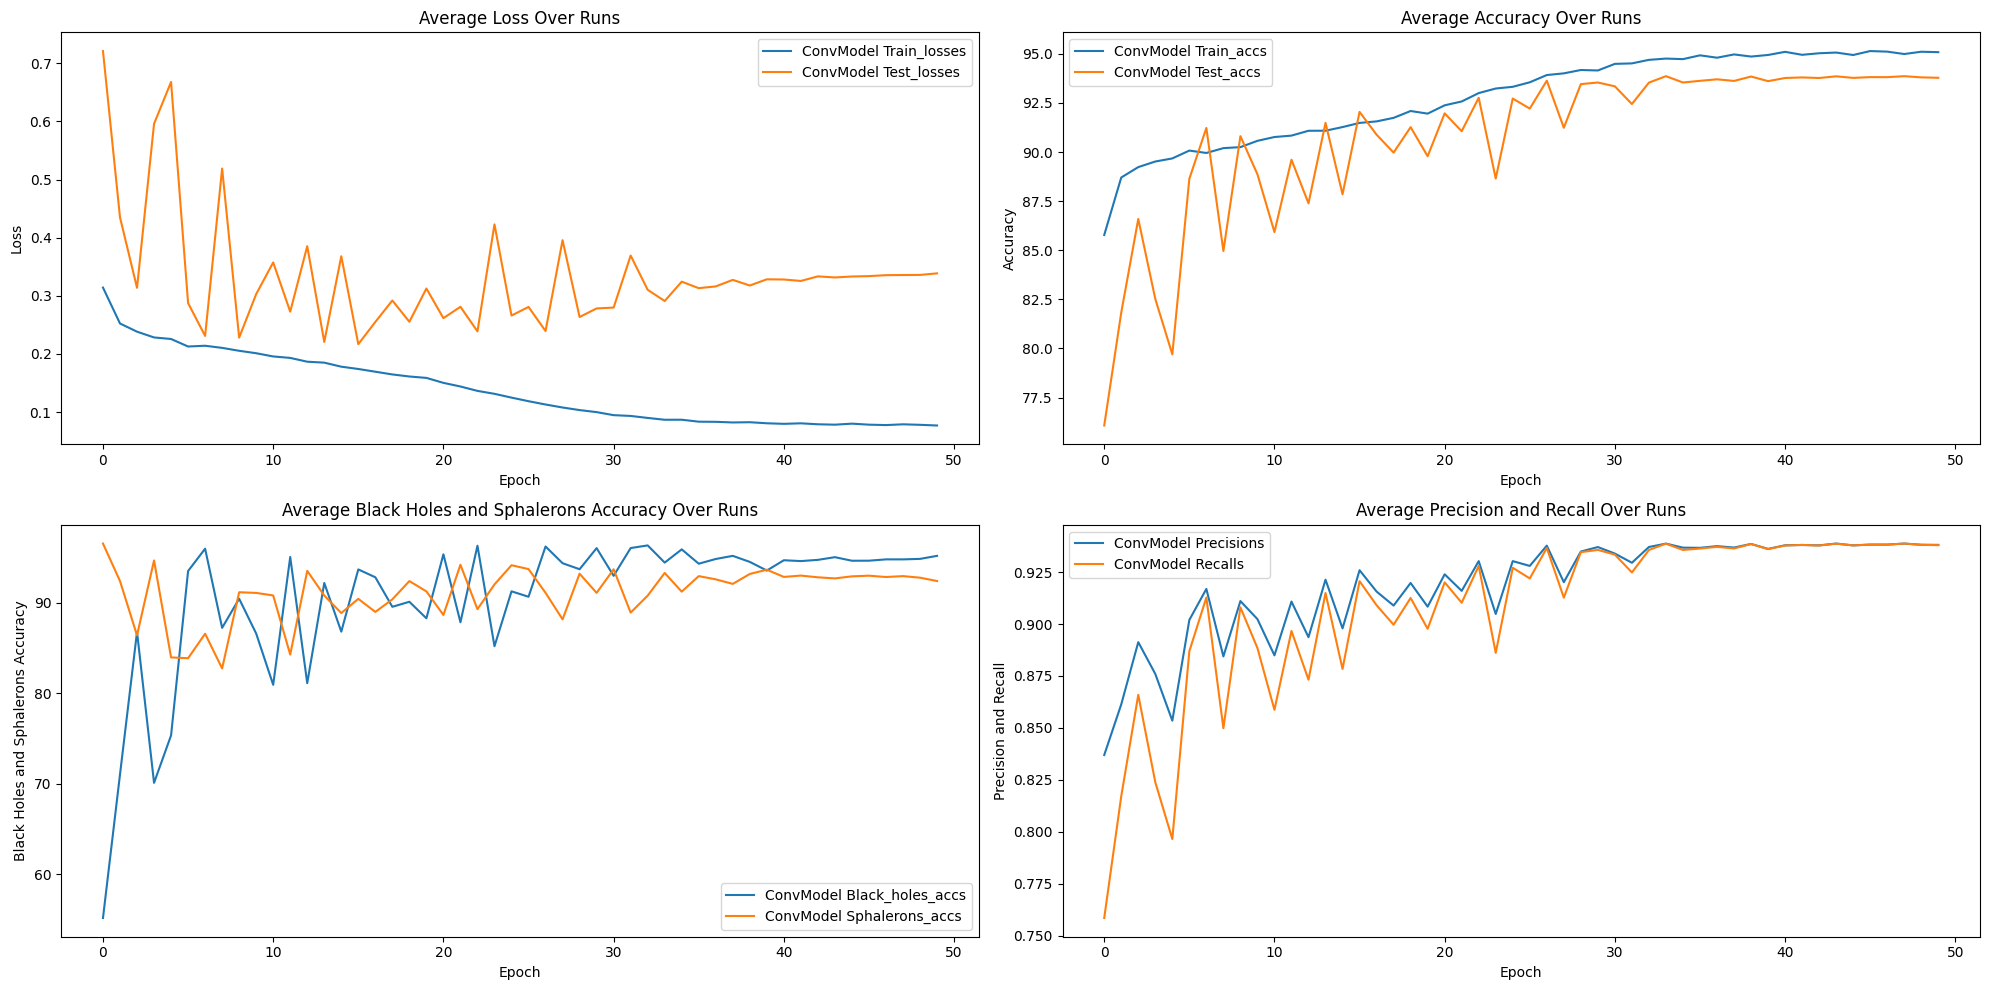


Metrics for ConvModel:
+-----------------+-----------------+------------------+-----------------+------------------+--------------------+-------------------+-----------------+-----------------+
| Epoch           | train_losses    | train_accs       | test_losses     | test_accs        | black_holes_accs   | sphalerons_accs   | precisions      | recalls         |
+=================+=================+==================+=================+==================+====================+===================+=================+=================+
| 1               | 0.31 ± 0.00     | 85.78 ± 0.07     | 0.72 ± 0.64     | 76.08 ± 11.74    | 55.16 ± 27.24      | 96.54 ± 4.24      | 0.84 ± 0.16     | 0.76 ± 0.28     |
+-----------------+-----------------+------------------+-----------------+------------------+--------------------+-------------------+-----------------+-----------------+
| 2               | 0.25 ± 0.00     | 88.70 ± 0.10     | 0.43 ± 0.16     | 81.83 ± 6.78     | 71.03 ± 20.81      | 92.40 

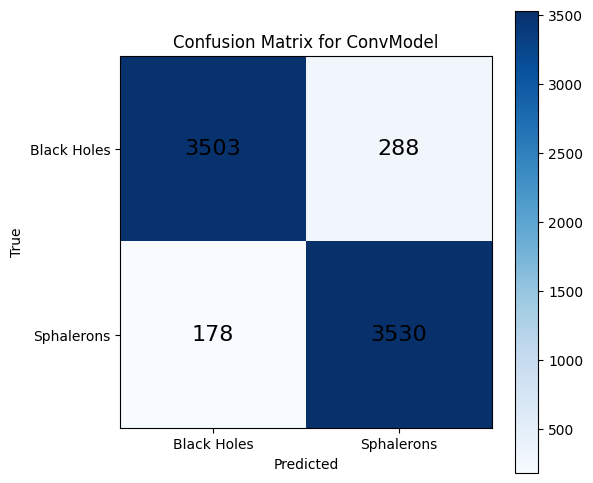

In [116]:
all_avg_run_metrics = []

# Here we define epochs, runs and dropout rate
n_runs = 5
n_epochs = 50
dropout = 0.3
model_classes = [nnmodel.ConvModel]
all_run_metrics = []
all_best_models = []

# This is where we run training and return all averaged metrics
for model_class in model_classes:
    avg_run_metrics, run_metrics, best_models = train_multiple_runs(model_class, n_runs, n_epochs, trainLoader, testLoader, dropout)
    all_avg_run_metrics.append(avg_run_metrics)
    all_run_metrics.append(run_metrics)
    all_best_models.append(best_models)

# Call the function
plot_average_metrics(all_avg_run_metrics, model_classes)

# This is where we display all tabular data
create_results_table(all_run_metrics, model_classes)

# This is where we display confusion matrices
for i, best_models in enumerate(all_best_models):
    plot_confusion_matrix(
        all_best_models=best_models,
        model_class=model_classes[i],
        test_loader=testLoader,
        n_classes=2,
        device=device,
        dropout=dropout
    )

Code below makes it possible to save model

In [117]:
# torch.save(model.state_dict(), model_save_path)
# model_save_path = "model_checkpoint.pth"
# # Load the saved model
# model.load_state_dict(torch.load(model_save_path))

# # Set the model to evaluation mode
# model.eval()

# # Function to test the model
# def test_model(model, test_loader, device):
#     correct = 0
#     total = 0

#     with torch.no_grad():
#         for data, target in test_loader:
#             data, target = data.to(device), target.to(device)
#             output = model(data)
#             _, predicted = torch.max(output.data, 1)
#             total += target.size(0)
#             correct += (predicted == target).sum().item()

#     accuracy = 100 * correct / total
#     print(f"Accuracy of the model on test data: {accuracy}%")

# # Test the model
# test_model(model, testLoader, device)